In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2008-01-01", "2023-01-01", auto_adjust=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [4]:
data.shape

(3775, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2008-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3775 non-null   float64
 1   High    3775 non-null   float64
 2   Low     3775 non-null   float64
 3   Close   3775 non-null   float64
 4   Volume  3775 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,3775.000000,3775.000000,3775.000000,3775.000000,3775.000000
mean,3.905976,3.993545,3.814814,3.899587,130315.147550
std,1.908998,1.959997,1.853815,1.904075,54143.359339
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.732500,2.778000,2.683500,2.730500,91772.500000
50%,3.437000,3.507000,3.360000,3.434000,125222.000000
75%,4.366000,4.436000,4.271000,4.357000,160160.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


<Axes: xlabel='Date'>

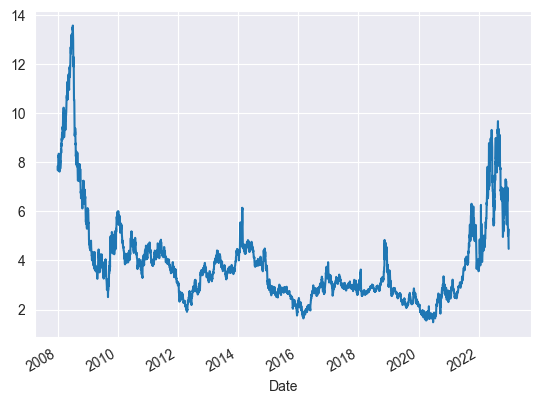

In [7]:
data.Close.plot()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_8720\557464052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'])


<Axes: xlabel='Close', ylabel='Density'>

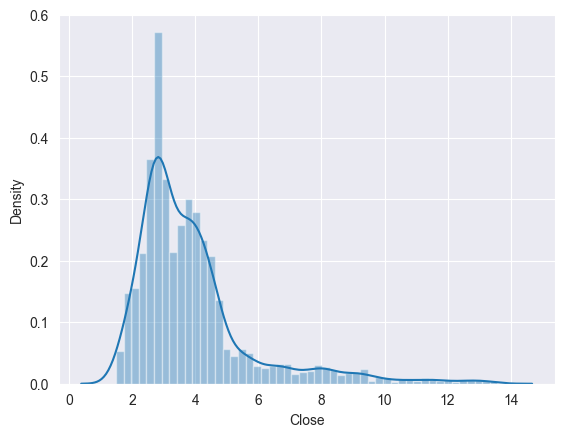

In [8]:
sns.distplot(data['Close'])

C:\Users\ENVY\AppData\Local\Temp\ipykernel_8720\3825147198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Open'])


<Axes: xlabel='Open', ylabel='Density'>

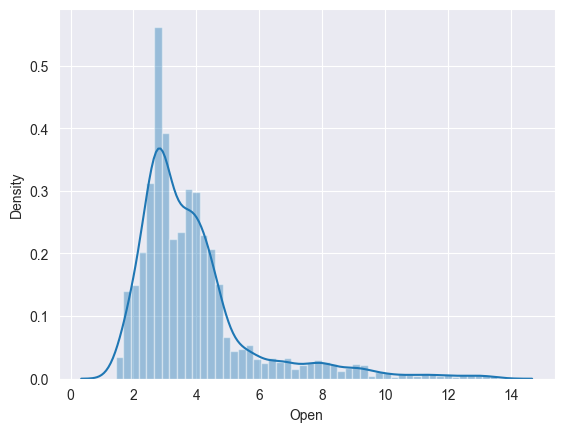

In [9]:
sns.distplot(data['Open'])

C:\Users\ENVY\AppData\Local\Temp\ipykernel_8720\668616605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['High'])


<Axes: xlabel='High', ylabel='Density'>

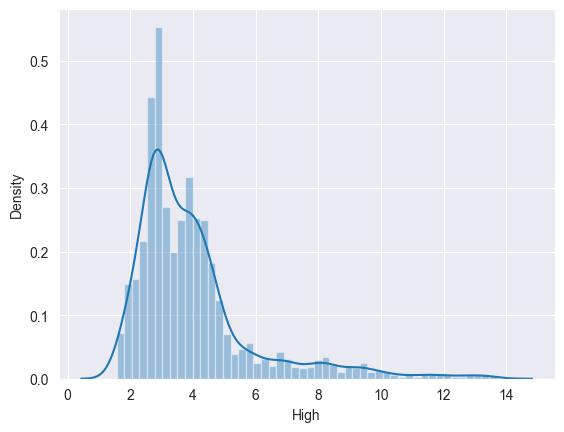

In [10]:
sns.distplot(data['High'])

# Conclusions

- Shape of the data
- how our data is distributed
- It is very non-linear
- Do not use linear regression in real world

In [14]:
X = data.drop(['Close'], axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3020, 4)
(755, 4)
(3020,)
(755,)


In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
pred1 = reg.predict(x_test)

In [16]:
pred1

array([11.3060906 ,  4.65667415,  2.92192155,  4.10956798,  3.6591414 ,
        3.16418333,  2.71075539,  2.08123278,  2.94262156,  2.77500146,
        2.2762311 ,  7.78158057,  4.27862615,  2.12168664,  4.93745375,
        3.93265198,  2.57333724,  3.7293413 ,  2.29257673,  4.41120868,
        4.46567046,  8.64092268,  2.33646747,  4.54650088,  6.58057448,
        2.54271347,  6.27148077,  5.36799   ,  2.62385683,  2.68036687,
        3.13081923,  4.06815118,  3.71148949,  2.08987188,  8.36902192,
        3.16444907,  3.27788446,  2.84564647,  5.01404925,  3.84562698,
        5.84505806,  1.7806633 ,  4.71858227,  3.74734599,  3.9100017 ,
        1.88220602,  3.81106234,  4.36976345,  4.00128233,  3.51590349,
        3.86133276,  2.71919362,  4.41108076,  2.78830563,  4.07896893,
        3.90452065,  2.76449675,  6.66223393,  2.88311613,  7.77951817,
        4.54912104,  3.81339716,  3.55252678,  4.54741169,  3.31441889,
        6.80589453,  3.23807042,  4.67304646,  2.69603607,  4.78

In [17]:
y_test

Date
2008-05-15    11.399
2022-12-28     4.709
2018-06-25     2.923
2013-04-26     4.151
2009-06-04     3.810
               ...  
2014-08-26     3.911
2013-02-21     3.246
2022-04-04     5.712
2019-03-13     2.820
2022-01-31     4.874
Name: Close, Length: 755, dtype: float64

In [18]:
# MSE --> Mean Squared Error
# RMSE --> sqrt(MSE)
# r2_score --> 1.0 === good model
from sklearn.metrics import mean_squared_error, r2_score


def calculate_metrics(y_test, y_pred):
    """
    Calculate the MSE, RMSE and R2 score
    :param y_test: ground truth 
    :param y_pred: predicted value
    :return: MSE, RMSE and R2 score
    """
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

In [19]:
calculate_metrics(y_test, pred1)

(0.0029227410252767555, 0.054062380869480356, 0.9991564744555423)

In [20]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
rd = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
rd_p = rd.predict(x_test)

In [21]:
calculate_metrics(y_test, la_p)

(0.26936742490865573, 0.5190061896631443, 0.9222584889354932)

In [22]:
calculate_metrics(y_test, rd_p)

(0.0029774601421110733, 0.05456610799856513, 0.9991406820974713)

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {"C": [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf']
          }
grid = GridSearchCV(svr, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.045 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.059 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.083 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.059 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.043 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.057 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.082 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.071 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.056 total time=   0.8s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [26]:
svr = SVR(kernel='rbf', C=10, gamma=0.01)
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

In [27]:
import joblib

joblib.dump(rd, 'model.pkl')
ridge_from_joblib = model = joblib.load('model.pkl')